In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
bank = pd.read_csv("bank-full.csv",sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.shape

(45211, 17)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# There is no Null value

In [6]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# Removing the unwanted columns

In [7]:
bank.drop(['day','month'],inplace=True,axis = 1)
bank

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no


In [8]:
bank.shape

(45211, 15)

In [9]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label

LabelEncoder()

In [10]:
def object_to_int(bank):
    if bank.dtype == "object":
        bank = LabelEncoder().fit_transform(bank)
        
    return bank   

In [11]:
bank = bank.apply(lambda x: object_to_int(x))
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,198,1,-1,0,3,0


In [12]:
bank['pdays']=label.fit_transform(bank.pdays)
bank["pdays"]

0          0
1          0
2          0
3          0
4          0
        ... 
45206      0
45207      0
45208    181
45209      0
45210    185
Name: pdays, Length: 45211, dtype: int64

In [13]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,261,1,0,0,3,0
1,44,9,2,1,0,29,1,0,2,151,1,0,0,3,0
2,33,2,1,1,0,2,1,1,2,76,1,0,0,3,0
3,47,1,1,3,0,1506,1,0,2,92,1,0,0,3,0
4,33,11,2,3,0,1,0,0,2,198,1,0,0,3,0


# Feature and Target selection

In [14]:
X = bank.iloc[:,0:14]
y = bank.iloc[:,-1]

In [15]:
X

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,261,1,0,0,3
1,44,9,2,1,0,29,1,0,2,151,1,0,0,3
2,33,2,1,1,0,2,1,1,2,76,1,0,0,3
3,47,1,1,3,0,1506,1,0,2,92,1,0,0,3
4,33,11,2,3,0,1,0,0,2,198,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,977,3,0,0,3
45207,71,5,0,0,0,1729,0,0,0,456,2,0,0,3
45208,72,5,1,1,0,5715,0,0,0,1127,5,181,3,2
45209,57,1,1,1,0,668,0,0,1,508,4,0,0,3


In [16]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

# Feature Scalling

In [17]:
bank.shape

(45211, 15)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [19]:
x

array([[ 1.60696496, -0.10381968, -0.27576178, ..., -0.41431746,
        -0.25194037,  0.44489814],
       [ 0.28852927,  1.42400783,  1.3683719 , ..., -0.41431746,
        -0.25194037,  0.44489814],
       [-0.74738448, -0.71495069, -0.27576178, ..., -0.41431746,
        -0.25194037,  0.44489814],
       ...,
       [ 2.92540065,  0.20174582, -0.27576178, ...,  1.45327007,
         1.05047333, -0.56617504],
       [ 1.51279098, -1.02051619, -0.27576178, ..., -0.41431746,
        -0.25194037,  0.44489814],
       [-0.37068857, -0.71495069, -0.27576178, ...,  1.49454272,
         4.52357654, -1.57724822]])

# Train and Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=0)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((36168, 14), (9043, 14), (36168,), (9043,))

# Model Creation

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

# Model Validation with Confusion Matrix

In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [27]:
y_test

14001    0
32046    1
13318    0
42991    0
14237    0
        ..
18448    1
6654     0
17106    0
9025     1
13171    0
Name: y, Length: 9043, dtype: int32

In [28]:
val = pd.DataFrame({"Actual":y_test,"Prediction":y_pred})

In [29]:
val

,Actual,Prediction
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
18448,1,0
6654,0,0
17106,0,0
9025,1,0


In [30]:
pd.crosstab(val["Actual"],val["Prediction"])

Prediction,0,1
Actual,,
0,7807,173
1,837,226


In [31]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [32]:
y_test

14001    0
32046    1
13318    0
42991    0
14237    0
        ..
18448    1
6654     0
17106    0
9025     1
13171    0
Name: y, Length: 9043, dtype: int32

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [34]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[7807,  173],
       [ 837,  226]], dtype=int64)

In [35]:
accuracy_score(y_test,y_pred)

0.8883114010837112

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.57      0.21      0.31      1063

    accuracy                           0.89      9043
   macro avg       0.73      0.60      0.62      9043
weighted avg       0.86      0.89      0.87      9043



# ROC and AUC curve

In [37]:
from sklearn.metrics import roc_curve,auc

In [38]:
fpr,tpr,thresh = roc_curve(y_test,y_pred)
a = auc(fpr,tpr)
a

0.5954633172772005

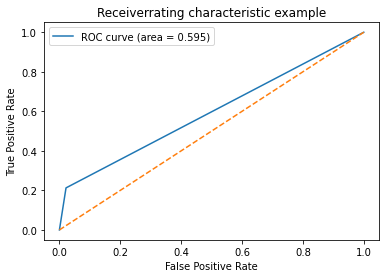

In [39]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % a)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')

plt.legend()
plt.show()